The yellow cells on the images represent the memory points at which a page fault happens.

In [226]:
pages = []
import random
import copy
i=1
memorysize=100
while(i<10000):
  pages.append([random.randint(1, 100), random.randint(1,1000)]) #page, arrival time
  i = i+1
print(pages)

[[429, 587], [152, 196], [721, 186], [892, 258], [99, 858], [360, 54], [185, 859], [413, 430], [428, 4], [94, 305], [677, 480], [287, 832], [99, 383], [673, 454], [5, 104], [993, 496], [798, 753], [22, 980], [813, 542], [169, 527], [765, 843], [345, 206], [964, 643], [220, 95], [330, 340], [378, 472], [891, 352], [344, 335], [652, 747], [915, 707], [691, 498], [967, 821], [708, 111], [354, 77], [891, 96], [643, 279], [262, 319], [190, 521], [20, 44], [290, 651], [890, 882], [22, 298], [530, 372], [603, 881], [77, 596], [390, 930], [814, 390], [696, 785], [61, 625], [915, 522], [160, 252], [974, 845], [832, 251], [365, 341], [303, 647], [508, 525], [630, 1], [714, 412], [963, 516], [882, 45], [985, 294], [786, 239], [516, 635], [318, 115], [92, 913], [222, 392], [822, 930], [258, 482], [273, 734], [366, 896], [742, 508], [871, 676], [623, 784], [316, 139], [218, 333], [503, 46], [18, 492], [899, 122], [245, 171], [24, 53], [345, 805], [930, 900], [881, 512], [675, 467], [502, 569], [584

FIFO (First In First Out) - this algorithm works on the basis of the assumption that if a paging error occurs and the memory is full, the page that was in the memory the longest will be deleted, regardless of its content or the latest access time.

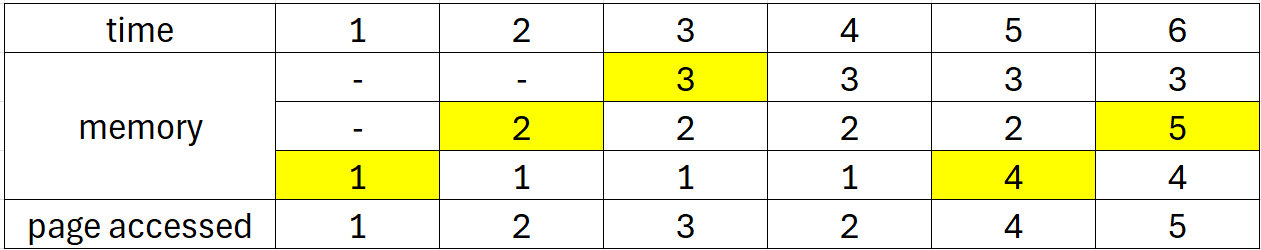

In [227]:
fifo=copy.deepcopy(pages)
fifo.sort(key=lambda y:y[1]) #sort by arrival time
pfFIFO=0
phFIFO=0
memory = [None]*memorysize #this is the memory containing the pages (at first it's empty)
print(fifo)
counter=0
for i in fifo:
  print(i[0])
  if(i[0] not in memory): #whenever a page fault occurs, the counter goes up by 1
    pfFIFO=pfFIFO+1
    memory[counter]=i[0]
    counter=counter+1
    if(counter==memorysize): #when the counter exceeds memory size it gets reset
      counter=0
  else:
    phFIFO=phFIFO+1
print(f"Memory: {memory}")
print(f"Generated page faults = {pfFIFO}")
print(f"Generated page hits = {phFIFO}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
274
463
945
533
310
202
491
370
107
277
380
207
260
1
630
741
540
418
930
869
333
77
33
348
632
228
23
881
180
9
768
230
429
168
513
727
54
949
137
32
260
810
458
693
86
302
153
904
923
796
86
7
81
647
482
929
99
932
639
514
890
377
404
892
738
689
269
244
392
842
327
248
398
392
71
62
724
33
995
173
806
554
818
288
867
357
953
868
736
682
932
215
721
142
414
698
767
465
495
579
939
879
707
112
255
677
36
598
834
872
478
84
532
11
670
877
31
224
817
104
33
976
699
720
102
167
44
443
621
962
665
333
929
801
385
456
227
466
854
563
283
837
42
894
674
753
749
398
189
876
278
370
289
914
891
265
695
606
793
306
200
343
391
194
88
847
176
422
13
226
17
488
350
344
63
922
804
412
88
848
217
612
270
983
691
156
379
918
984
956
894
869
920
867
310
919
633
805
800
177
330
476
930
309
975
506
873
687
787
502
712
289
743
13
549
373
179
152
811
322
14
347
921
83
90
844
611
155
585
574
761
319
44
722
742
842
205
153
920
768
495
59
295

OPT (Optimal Page Replacement) - if a paging error occurs and the memory is full, the algorithm tries to predict which page will not be needed for the longest period of time and deletes it. This isn't easy to implement in reality as there is no way to know which pages exactly will be needed, but it's a good algorithm to compare the others to as it's supposed to be the most optimal. For my implementation the sequence of the pages is generated alltogether at the start, so there is no need to predict the future - I already know it. Unfortunately it's not that efficient, and running it for big memory with a lot pages can take a very long time (even up to ~5 minutes) to do the work.

For a sequence of pages [1, 2, 3, 2, 4, 3, 2] it will for example be look like this (as after 4 the 1 is never used it will be changed - if instead of 3, 2 at the end there would be 1,3,2 the two would be changed as it's the furthest away into the future)

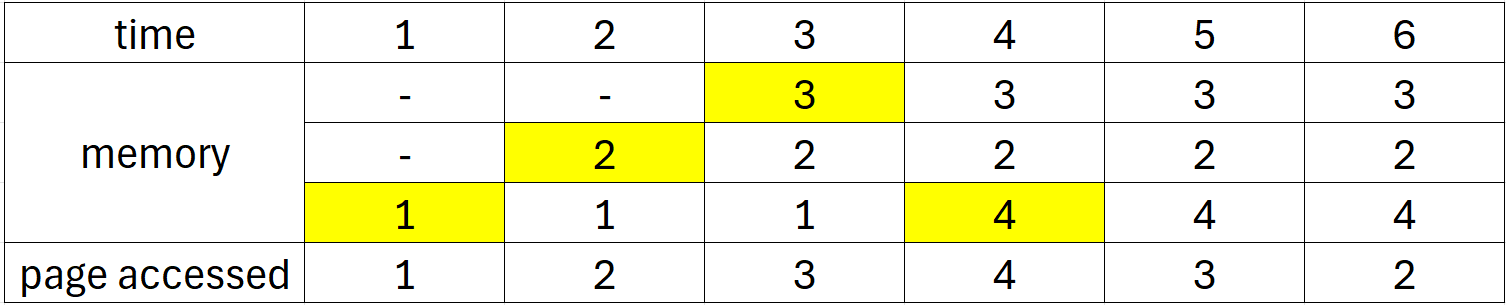

In [228]:
import pandas as pd
opt=copy.deepcopy(pages)
opt.sort(key=lambda y:y[1]) #sort by arrival time
rem=copy.deepcopy(opt) #this will be used to measure the time of next hit for a page
pfOPT=0
phOPT=0
counter=0
time=0
memory = [None]*memorysize #this is the memory containing the pages (at first it's empty)
print(opt)
for i in opt:
  print(i[0])
  time=i[1]
  if i[0] not in memory:
    pfOPT=pfOPT+1
    if(not (memory[memorysize-1] is None)):
      found=False
      index=0
      times=[] #this table will track the times of next hit for all the pages in memory
      for k in memory:
        havetime=False #this is used to check if a page is even accessed again in the future
        for j in rem:
          if(k == j[0]):
              times.append(j[1]-time)
              havetime=True
              break
        if not havetime:
          times.append(1000000000000000) #if a page is not accessed again, the time will be infinite, so I just allocated a very large number to it
          break
      memory[pd.Series(times).idxmax()]=i[0] #now we look for the index with the biggest time, and change it in memory
    else:
      memory[counter]=i[0] #if the memory isn't full it fills up normally
      counter=counter+1
  else:
    phOPT=phOPT+1
  rem.pop(0)
print(f"Memory: {memory}")
print(f"Generated page faults = {pfOPT}")
print(f"Generated page hits = {phOPT}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
274
463
945
533
310
202
491
370
107
277
380
207
260
1
630
741
540
418
930
869
333
77
33
348
632
228
23
881
180
9
768
230
429
168
513
727
54
949
137
32
260
810
458
693
86
302
153
904
923
796
86
7
81
647
482
929
99
932
639
514
890
377
404
892
738
689
269
244
392
842
327
248
398
392
71
62
724
33
995
173
806
554
818
288
867
357
953
868
736
682
932
215
721
142
414
698
767
465
495
579
939
879
707
112
255
677
36
598
834
872
478
84
532
11
670
877
31
224
817
104
33
976
699
720
102
167
44
443
621
962
665
333
929
801
385
456
227
466
854
563
283
837
42
894
674
753
749
398
189
876
278
370
289
914
891
265
695
606
793
306
200
343
391
194
88
847
176
422
13
226
17
488
350
344
63
922
804
412
88
848
217
612
270
983
691
156
379
918
984
956
894
869
920
867
310
919
633
805
800
177
330
476
930
309
975
506
873
687
787
502
712
289
743
13
549
373
179
152
811
322
14
347
921
83
90
844
611
155
585
574
761
319
44
722
742
842
205
153
920
768
495
59
295

LRU (Least Recently Used) - if a paging error occurs and the memory is full it deletes the least recently used pages, which means it has to keep track of what page is accessed when.

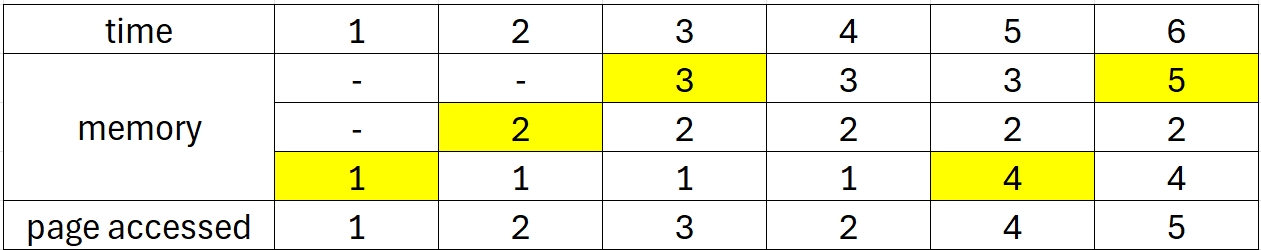

In [229]:
lru=copy.deepcopy(pages)
lru.sort(key=lambda y:y[1]) #sort by arrival time
pfLRU=0
phLRU=0
counter=0
order=[] #this will keep track of the order at which pages are accessed
memory = [None]*memorysize #this is the memory containing the pages (at first it's empty)
print(lru)
for i in lru:
  print(i[0])
  if(i[0] not in memory):
    pfLRU=pfLRU+1 #if a page isn't memory a paging error occurs
    if(not (memory[memorysize-1] is None)): #if the memory is full we look for the least recently accessed page (order[0]) in the memory
      for idx, value in enumerate(memory):  #and change it to the new page
        if(value == order[0]):
            memory[idx] = i[0]
            order = order[1:] #remove the changed page
            break
    else:
      memory[counter]=i[0] #if the memory isn't full it fills up normally
      counter=counter+1
  else:
    phLRU=phLRU+1
    order.remove(i[0]) #if a page is in memory we delete it from order so that it will be at the end of order
  order.append(i[0]) #add the new page to the end of order
print(f"Memory: {memory}")
print(f"Generated page faults = {pfLRU}")
print(f"Generated page hits = {phLRU}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
274
463
945
533
310
202
491
370
107
277
380
207
260
1
630
741
540
418
930
869
333
77
33
348
632
228
23
881
180
9
768
230
429
168
513
727
54
949
137
32
260
810
458
693
86
302
153
904
923
796
86
7
81
647
482
929
99
932
639
514
890
377
404
892
738
689
269
244
392
842
327
248
398
392
71
62
724
33
995
173
806
554
818
288
867
357
953
868
736
682
932
215
721
142
414
698
767
465
495
579
939
879
707
112
255
677
36
598
834
872
478
84
532
11
670
877
31
224
817
104
33
976
699
720
102
167
44
443
621
962
665
333
929
801
385
456
227
466
854
563
283
837
42
894
674
753
749
398
189
876
278
370
289
914
891
265
695
606
793
306
200
343
391
194
88
847
176
422
13
226
17
488
350
344
63
922
804
412
88
848
217
612
270
983
691
156
379
918
984
956
894
869
920
867
310
919
633
805
800
177
330
476
930
309
975
506
873
687
787
502
712
289
743
13
549
373
179
152
811
322
14
347
921
83
90
844
611
155
585
574
761
319
44
722
742
842
205
153
920
768
495
59
295

ARLU (Approximated Least Recently Used) - there are many versions of approximations of LRU. Personally I chose one described on this site - https://www.tutorialspoint.com/lru-approximation-second-chance-algorithm

The way it works is it stores a singular bit for each page in memory, which more or less describes if the page was recently hit. If it was - the bit=1, otherwise 0. The recency is determined by a circular buffer, which is supposed to move with every attempt to access a new page, as well as when it's looking for a page that wasn't hit.

On the image the numbers in brackets represent the reference bits, although the example doesn't include the circular idenifier.
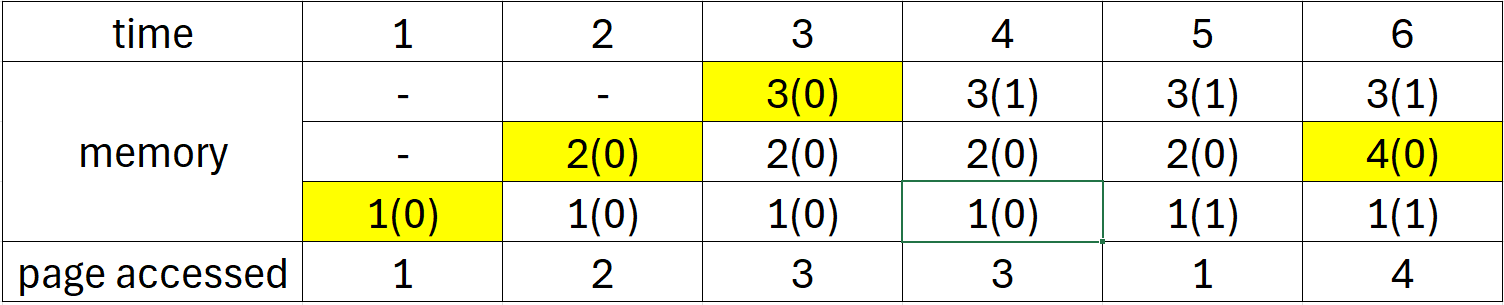

In [230]:
alru=copy.deepcopy(pages)
alru.sort(key=lambda y:y[1]) #sort by arrival time
pfaLRU=0
phaLRU=0
counter=0
spot=0
memory = [None]*memorysize #this is the memory containing the pages (at first it's empty)
print(alru)
ref=[] #this keeps track of the reference bits
for i in range(0, memorysize):
  ref.append(0) #at first all of them will be 0
for i in alru:
  print(i[0])
  if(i[0] not in memory):
    pfaLRU=pfaLRU+1 #if a page isn't in memory a paging error occurs
    if(not (memory[memorysize-1] is None)):
      while(ref[counter!=0]): #now we're looking for a page with a reference bit=0 to be replaced for the new one
        if(ref[counter]==1):  #we also change all the bits=1 we encounter to 0 (the hits become too old)
          ref[counter]=0
        counter=counter+1
        if(counter==memorysize):
          counter=0
    memory[counter]=i[0]
  else: #when a page present in memory is accessed its reference bit is changed to 1
    ref[memory.index(i[0])]=1
    phaLRU=phaLRU+1
  counter=counter+1 #to not change the most recently added page, we add another 1 to the counter at the end of the process
  if(counter==memorysize):
    counter=0
print(f"Memory: {memory}")
print(f"Generated page faults = {pfaLRU}")
print(f"Generated page hits = {phaLRU}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
274
463
945
533
310
202
491
370
107
277
380
207
260
1
630
741
540
418
930
869
333
77
33
348
632
228
23
881
180
9
768
230
429
168
513
727
54
949
137
32
260
810
458
693
86
302
153
904
923
796
86
7
81
647
482
929
99
932
639
514
890
377
404
892
738
689
269
244
392
842
327
248
398
392
71
62
724
33
995
173
806
554
818
288
867
357
953
868
736
682
932
215
721
142
414
698
767
465
495
579
939
879
707
112
255
677
36
598
834
872
478
84
532
11
670
877
31
224
817
104
33
976
699
720
102
167
44
443
621
962
665
333
929
801
385
456
227
466
854
563
283
837
42
894
674
753
749
398
189
876
278
370
289
914
891
265
695
606
793
306
200
343
391
194
88
847
176
422
13
226
17
488
350
344
63
922
804
412
88
848
217
612
270
983
691
156
379
918
984
956
894
869
920
867
310
919
633
805
800
177
330
476
930
309
975
506
873
687
787
502
712
289
743
13
549
373
179
152
811
322
14
347
921
83
90
844
611
155
585
574
761
319
44
722
742
842
205
153
920
768
495
59
295

RAND - when a paging error occurs, a random page is deleted and replaced by the one which was supposed to be accessed.

Not sure if an exemplary image for this makes sense, since pretty much anything goes for this one, but here it is.

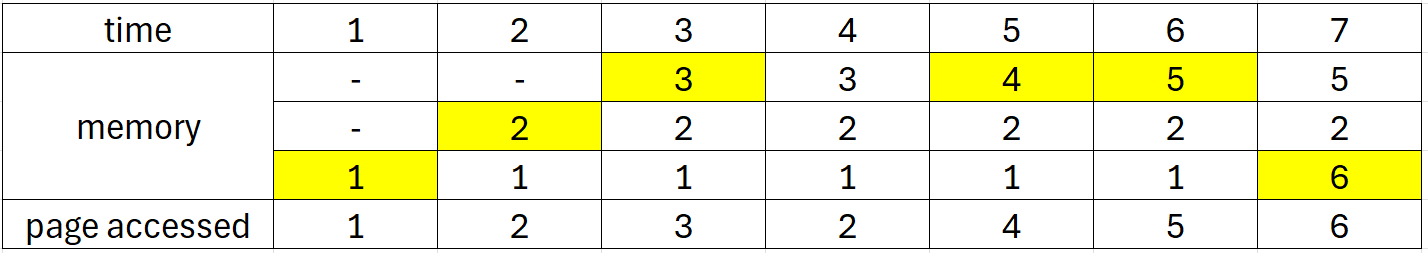

In [231]:
rand=copy.deepcopy(pages)
rand.sort(key=lambda y:y[1]) #sort by arrival time
pfRAND=0
phRAND=0
memory = [None]*memorysize #this is the memory containing the pages (at first it's empty)
print(rand)
counter=0
for i in rand:
  print(i[0])
  if(i[0] not in memory):
    pfRAND=pfRAND+1
    if(not (memory[memorysize-1] is None)):
        memory[random.randrange(memorysize-1)]=i[0]  #if the memory is full the new page is transfered to a random space in memory
    else:
      memory[counter]=i[0] #otherwise it fills up normally
      counter=counter+1
  else:
    phRAND=phRAND+1
print(f"Memory: {memory}")
print(f"Generated page faults = {pfRAND}")
print(f"Generated page hits = {phRAND}")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
274
463
945
533
310
202
491
370
107
277
380
207
260
1
630
741
540
418
930
869
333
77
33
348
632
228
23
881
180
9
768
230
429
168
513
727
54
949
137
32
260
810
458
693
86
302
153
904
923
796
86
7
81
647
482
929
99
932
639
514
890
377
404
892
738
689
269
244
392
842
327
248
398
392
71
62
724
33
995
173
806
554
818
288
867
357
953
868
736
682
932
215
721
142
414
698
767
465
495
579
939
879
707
112
255
677
36
598
834
872
478
84
532
11
670
877
31
224
817
104
33
976
699
720
102
167
44
443
621
962
665
333
929
801
385
456
227
466
854
563
283
837
42
894
674
753
749
398
189
876
278
370
289
914
891
265
695
606
793
306
200
343
391
194
88
847
176
422
13
226
17
488
350
344
63
922
804
412
88
848
217
612
270
983
691
156
379
918
984
956
894
869
920
867
310
919
633
805
800
177
330
476
930
309
975
506
873
687
787
502
712
289
743
13
549
373
179
152
811
322
14
347
921
83
90
844
611
155
585
574
761
319
44
722
742
842
205
153
920
768
495
59
295

The algorithm which generates the least page faults (and by far) is OPT - it can generate up to 75% less than the others. That's of course expected, but it's not a realistic implementation. The rest is fairly close together and their ranking varies quite a bit, but generally speaking the one with the least faults is LRU, then there's ALRU, FIFO and RAND. RAND sometimes exceeds the others (since it's randomised I'd assume it makes sense), but both FIFO and RAND also tend to exceed LRU and ALRU (which shouldn't happen). ALRU though always generates more page faults than regular LRU, which is completely in line.

My guess is the this outcome is to an extent the fault of random page generation. I'm assuming if I had a sample resembling more closely the generation of pages in an actual system the results would more diverse.